In [105]:
import pandas as pd
import numpy as np
import statsmodels as sms
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn import svm
import openpyxl
import statsmodels.discrete.discrete_model as smd

In [5]:
#import CSV file
X_train = pd.read_csv('OnlineAd_X_train.csv', header=None)
Y_train = pd.read_csv('OnlineAd_Y_train.csv',names= ['class','class 2','class 3'])
Y_train.loc[Y_train['class 2'] == 1, ['class']] = 2
Y_train.loc[Y_train['class 3'] == 1, ['class']] = 3
Y_train.drop(columns= ['class 2','class 3'])
Y_train= Y_train['class']
Y_train=pd.DataFrame(Y_train)
print(Y_train)

      class
0       1.0
1       3.0
2       1.0
3       1.0
4       1.0
...     ...
1447    1.0
1448    3.0
1449    1.0
1450    3.0
1451    1.0

[1452 rows x 1 columns]


In [100]:
fig = px.scatter_matrix(
    X_train,
    color="speices"
)
#   Visualization
fig.update_traces(diagonal_visible=False)
fig.show()

g:\my drive\22-1\머신러닝\assignment 2\venv\lib\site-packages\plotly\express\_core.py:1101: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_output[df_input.columns] = df_input[df_input.columns]
g:\my drive\22-1\머신러닝\assignment 2\venv\lib\site-packages\plotly\express\_core.py:1101: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_output[df_input.columns] = df_input[df_input.columns]
g:\my drive\22-1\머신러닝\assignment 2\venv\lib\site-packages\plotly\express\_core.py:1101: PerformanceWarning: DataFrame is highly fragmented.  This is usu

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250] but received: speices

In [102]:


# Finding Variance

df_var= pd.DataFrame(X_train.var())
print(df_var[0].nsmallest(n=50))
print(df_var[0].nlargest(n=50))



156    0.262711
173    0.266750
108    0.270667
182    0.274017
199    0.278547
170    0.278635
164    0.280016
1      0.281459
55     0.284609
198    0.284659
195    0.286714
174    0.287124
114    0.288298
166    0.288826
214    0.289270
12     0.290804
49     0.291023
62     0.291211
71     0.291440
14     0.291895
159    0.293351
161    0.293481
221    0.293543
60     0.296277
46     0.296592
205    0.296737
125    0.296856
176    0.297596
57     0.297733
204    0.298083
98     0.298237
54     0.299042
67     0.299208
147    0.299215
73     0.300780
184    0.300839
107    0.301343
131    0.301426
248    0.301649
247    0.302814
110    0.303229
8      0.303834
240    0.305087
35     0.305249
47     0.305436
99     0.305712
97     0.306294
210    0.306481
39     0.306559
4      0.307656
Name: 0, dtype: float64
61     0.859434
10     0.635607
190    0.634734
241    0.593198
63     0.569747
5      0.568945
111    0.532953
79     0.517279
211    0.508033
229    0.507439
126    0.499066


In [113]:
# As minimum value is abobe 0.26. PCA is better than choosing some features with high variances.
# Plotting Scree plot.
pca = PCA()
pca.fit(X_train)
exp_var =pca.explained_variance_ratio_
px.area(
    x=range(1, exp_var.shape[0] + 1),
    y=exp_var,
    labels={"x": "# Components", "y": "Proportion of Explained Variance"}
)
# Component # 3 is an elbow

# printcipalComponents = pca.fit_transform(X_train)
# X_train_pca= pd.DataFrame(data=printcipalComponents)
# print(principalDf)
# print(Y_train)

In [ ]:
pca=PCA(n_components=2)
principalcomponents=pca.fit_transform(X_train)
principaldf=pd.DataFrame(data=principalcomponents, columns=['principal component1', 'principal component2'])
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)
# finalDf=pd.concat([principaldf,Y_train],axis=1)
# print(finalDf)
# targets = [1, 2,3]
# colors = ['r', 'g', 'b']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['class'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'principal component1']
#                , finalDf.loc[indicesToKeep, 'principal component2']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()

      principal component1  principal component2  principal component3  class
0                -0.924000             -3.264161              0.704544    1.0
1                -1.067117             -3.809823              0.511222    3.0
2                -1.438739             -2.884518              0.420483    1.0
3                 0.049906             -3.847784              0.114017    1.0
4                10.627964              2.649279             -0.519647    1.0
...                    ...                   ...                   ...    ...
1447             -1.699095             -3.958451              0.289298    1.0
1448             -0.626660              3.928789              0.923948    3.0
1449             -0.492753             -2.944189              0.087276    1.0
1450            -19.241797              6.035977              0.708454    3.0
1451             -2.191718             -2.643318              0.021674    1.0

[1452 rows x 4 columns]


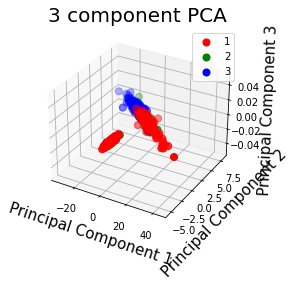

In [79]:
pca=PCA(n_components=3)
principalcomponents=pca.fit_transform(X_train)
principaldf=pd.DataFrame(data=principalcomponents, columns=['principal component1', 'principal component2', 'principal component3'])
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 2, 1, projection = '3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize=20)
finalDf=pd.concat([principaldf,Y_train],axis=1)
print(finalDf)
targets = [1, 2,3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component1']
               , finalDf.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [83]:
pca = PCA(n_components=3)
logreg=LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000).fit(X_train, Y_train)

         0       1       2       3       4       5       6       7       8    \
0     0.9687 -0.3948 -0.5467 -0.1611  0.3003 -0.3423 -0.2714 -0.3337  0.4581   
1    -0.4669  0.5222  0.6956 -0.6545  0.4683 -1.3767 -0.8648 -0.1455  1.0665   
2    -1.1187  0.2340 -0.0558 -0.3746  0.2157 -0.7238  0.1127 -0.3854 -0.4403   
3     0.6143  0.1321  0.3065  0.4454 -1.3510  0.4344  0.9074 -0.4787  0.5226   
4     0.9119  1.1340  0.4638  0.3419  0.8532  0.7698  0.8161  0.9577  0.3371   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1447 -1.6151 -0.0366  0.1771  0.0683  0.6009 -1.0059 -0.7811 -0.7509  0.0830   
1448 -0.5898 -0.0035  0.4417  0.0339 -0.3701  0.3677 -0.9483 -0.3817 -0.1512   
1449 -1.1236 -0.0516 -0.8155  0.3472  0.2073  0.1098  0.1199 -0.3269  0.4758   
1450 -1.3424 -0.9087 -0.7047 -1.2451 -1.1737 -1.7872 -1.6132 -1.7413 -0.6457   
1451 -0.6324  0.4225  0.3344 -0.2750 -0.2444 -0.6470 -0.1321 -1.1103  0.2170   

         9    ...     241     242     2

g:\my drive\22-1\머신러닝\assignment 2\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



# Cross validation- Logistic Regression

In [107]:
logreg=LogisticRegression(max_iter=1000)
Y_train=np.ravel(Y_train)
cv=RepeatedStratifiedKFold()
scores= cross_val_score(logreg,X_train, Y_train, cv=cv)
est = smd.MNLogit(Y_train.ravel(), X_train).fit()
print(np.mean(scores))
print(np.std(scores))

# scores= cross_val_score(logreg,principaldf, Y_train, cv=5)
# est = smd.MNLogit(Y_train.ravel(),principaldf).fit()
# print(est.summary2())
print(scores)

Optimization terminated successfully.
         Current function value: 0.551770
         Iterations 9
0.5513859462021566
0.023109055752737057
[0.54295533 0.59106529 0.52068966 0.51724138 0.56206897 0.52920962
 0.56357388 0.56551724 0.56551724 0.56896552 0.53264605 0.54639175
 0.57241379 0.57931034 0.56896552 0.51202749 0.53608247 0.5862069
 0.54482759 0.56206897 0.54982818 0.53608247 0.55172414 0.57241379
 0.53793103 0.53608247 0.54639175 0.57931034 0.52068966 0.56896552
 0.53608247 0.54982818 0.59310345 0.56551724 0.55862069 0.54639175
 0.50171821 0.5137931  0.58965517 0.54827586 0.52920962 0.58762887
 0.55172414 0.55517241 0.52758621 0.57044674 0.56013746 0.57241379
 0.50344828 0.54137931]


# KNN

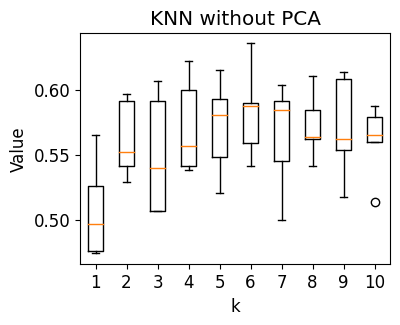

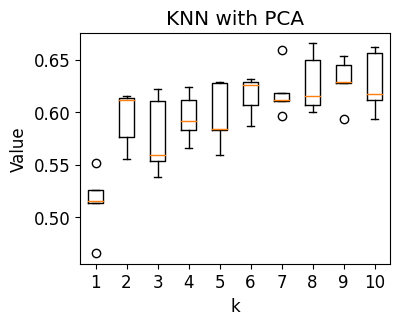

In [135]:
knn_results=[[None for x in range (2)]for y in range (10)]
for i in range(1,11):
    clf = KNeighborsClassifier(n_neighbors= i )
    scores= cross_val_score(clf,X_train, Y_train, scoring='accuracy', cv=5)
    knn_results[i-1][0]=scores
    scores= cross_val_score(clf,principaldf, Y_train,scoring='accuracy', cv=5)
    knn_results[i-1][1]=scores
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots()
ax.boxplot([knn_results[0][0],knn_results[1][0],knn_results[2][0],knn_results[3][0],knn_results[4][0],knn_results[5][0],knn_results[6][0],knn_results[7][0],knn_results[8][0],knn_results[9][0]])
ax.set_xlabel('k')
ax.set_title('KNN without PCA')
ax.set_ylabel('Value')
plt.show()
fig, ax = plt.subplots()
ax.boxplot([knn_results[0][1],knn_results[1][1],knn_results[2][1],knn_results[3][1],knn_results[4][1],knn_results[5][1],knn_results[6][1],knn_results[7][1],knn_results[8][1],knn_results[9][1]])
ax.set_xlabel('k')
ax.set_title('KNN with PCA')
ax.set_ylabel('Value')
plt.show()


# LDA & QDA


In [117]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

results=[[None for x in range (2)]for y in range (2)]
lda = LinearDiscriminantAnalysis()

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
# scores_lda= cross_val_score(lda,X_train, Y_train,scoring='accuracy', cv=5)
# scores_qda=cross_val_score(qda,X_train, Y_train,scoring='accuracy', cv=5)


cv=RepeatedStratifiedKFold()
scores_lda= cross_val_score(lda,principaldf, Y_train,scoring='accuracy', cv=cv)
scores_qda=cross_val_score(qda,principaldf, Y_train,scoring='accuracy', cv=cv)
print(np.mean(scores_lda))
print(np.mean(scores_qda))
print(np.std(scores_lda))
print(np.std(scores_qda))

print(scores_lda)
print(scores_qda)

0.646690129162223
0.6409131413674607
0.016591199745857165
0.021843759111165505
[0.66666667 0.65979381 0.63103448 0.61724138 0.66206897 0.65635739
 0.65292096 0.63793103 0.64482759 0.63793103 0.65979381 0.62542955
 0.63448276 0.66206897 0.65517241 0.66323024 0.66323024 0.61034483
 0.63793103 0.65172414 0.62199313 0.65292096 0.67241379 0.62413793
 0.66206897 0.63230241 0.65292096 0.63448276 0.63448276 0.67931034
 0.63573883 0.66666667 0.63793103 0.63793103 0.64827586 0.63573883
 0.63573883 0.65172414 0.67241379 0.65172414 0.65292096 0.67353952
 0.64137931 0.61724138 0.64482759 0.6185567  0.66666667 0.65517241
 0.63448276 0.65862069]
[0.60824742 0.68041237 0.64827586 0.63793103 0.61724138 0.59793814
 0.65979381 0.62068966 0.66896552 0.65862069 0.6185567  0.59793814
 0.67586207 0.68275862 0.62758621 0.64948454 0.60137457 0.65517241
 0.65862069 0.65172414 0.67010309 0.62886598 0.62413793 0.64137931
 0.65172414 0.65292096 0.63917526 0.65172414 0.62413793 0.64482759
 0.64948454 0.67697595 0.6

# 2D PCA for visualization

g:\my drive\22-1\머신러닝\assignment 2\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

g:\my drive\22-1\머신러닝\assignment 2\venv\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


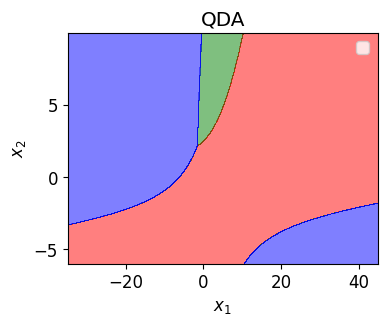

In [171]:
import matplotlib as mpl
import seaborn as sns
pca=PCA(n_components=2)
principalcomponents=pca.fit_transform(X_train)
principaldf=pd.DataFrame(data=principalcomponents, columns=['principal component1', 'principal component2'])
qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(principaldf,Y_train)
x1min, x1max = -35, 45
x2min, x2max = -6,10
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(qda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("QDA")
plt.legend()
plt.show()

g:\my drive\22-1\머신러닝\assignment 2\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

g:\my drive\22-1\머신러닝\assignment 2\venv\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


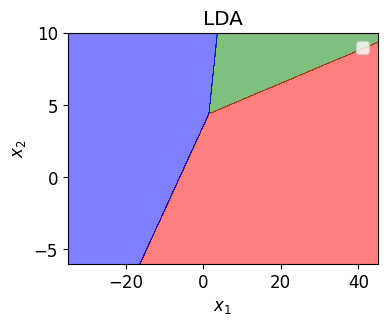

In [175]:
import matplotlib as mpl
import seaborn as sns

lda = LinearDiscriminantAnalysis(store_covariance=True).fit(principaldf,Y_train)
x1min, x1max = -35, 45
x2min, x2max = -6,10
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(lda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("LDA")
plt.legend()
plt.show()

# Decision Tree

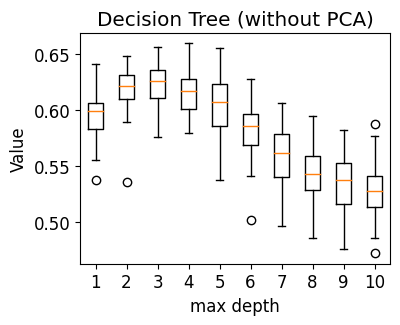

In [131]:
from sklearn import tree
df_results=[None for y in range (10)]
for i in range(1,11):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    cv = RepeatedStratifiedKFold()
    scores= cross_val_score(clf,X_train, Y_train, scoring='accuracy', cv=cv)
    df_results[i-1]=scores
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots()
ax.boxplot([df_results[0],df_results[1],df_results[2],df_results[3],df_results[4],df_results[5],df_results[6],df_results[7],df_results[8],df_results[9]])
ax.set_xlabel('max depth')
ax.set_title('Decision Tree (without PCA)')
ax.set_ylabel('Value')
plt.show()

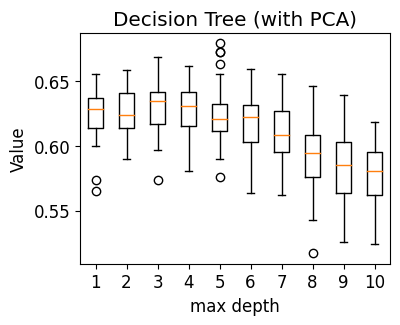

In [130]:
from sklearn import tree
df_results=[None for y in range (10)]
for i in range(1,11):
    clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
    cv = RepeatedStratifiedKFold()
    scores= cross_val_score(clf,principaldf, Y_train, scoring='accuracy', cv=cv)
    df_results[i-1]=scores
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots()
ax.boxplot([df_results[0],df_results[1],df_results[2],df_results[3],df_results[4],df_results[5],df_results[6],df_results[7],df_results[8],df_results[9]])
ax.set_xlabel('max depth')
ax.set_title('Decision Tree (with PCA)')
ax.set_ylabel('Value')
plt.show()

# Bagging

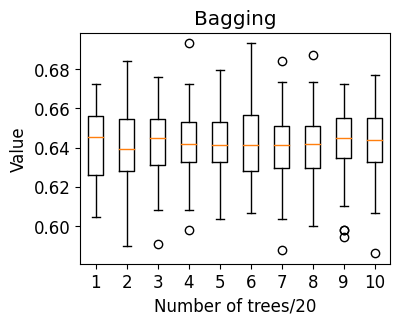

In [118]:
from sklearn.ensemble import BaggingClassifier
df_results=[None for y in range (10)]
for i in range(1,11):
    model = BaggingClassifier(n_estimators=20*i)
    cv = RepeatedStratifiedKFold()
    scores= cross_val_score(clf,X_train, Y_train, scoring='accuracy', cv=cv)
    df_results[i-1]=scores
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots()
ax.boxplot([df_results[0],df_results[1],df_results[2],df_results[3],df_results[4],df_results[5],df_results[6],df_results[7],df_results[8],df_results[9]])
ax.set_xlabel('Number of trees/20')
ax.set_title('Bagging')
ax.set_ylabel('Value')
plt.show()


AttributeError: 'BaggingClassifier' object has no attribute 'feature_importances_'

# Random Forest

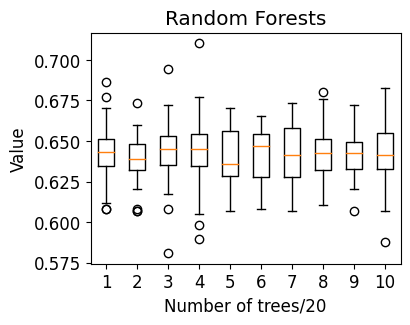

In [119]:
from sklearn.ensemble import RandomForestClassifier

df_results=[None for y in range (10)]
for i in range(1,11):
    model = RandomForestClassifier(n_estimators=20*i, max_features='sqrt')
    cv = RepeatedStratifiedKFold()
    scores= cross_val_score(clf,X_train, Y_train, scoring='accuracy', cv=cv)
    df_results[i-1]=scores
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots()
ax.boxplot([df_results[0],df_results[1],df_results[2],df_results[3],df_results[4],df_results[5],df_results[6],df_results[7],df_results[8],df_results[9]])
ax.set_xlabel('Number of trees/20')
ax.set_title('Random Forests')
ax.set_ylabel('Value')
plt.show()

Feature: 0, Score: 0.00399
Feature: 1, Score: 0.00279
Feature: 2, Score: 0.00506
Feature: 3, Score: 0.00450
Feature: 4, Score: 0.00339
Feature: 5, Score: 0.00205
Feature: 6, Score: 0.00402
Feature: 7, Score: 0.00322
Feature: 8, Score: 0.00318
Feature: 9, Score: 0.00294
Feature: 10, Score: 0.00364
Feature: 11, Score: 0.00305
Feature: 12, Score: 0.00290
Feature: 13, Score: 0.00388
Feature: 14, Score: 0.00339
Feature: 15, Score: 0.00341
Feature: 16, Score: 0.00292
Feature: 17, Score: 0.00840
Feature: 18, Score: 0.00215
Feature: 19, Score: 0.00391
Feature: 20, Score: 0.00248
Feature: 21, Score: 0.00344
Feature: 22, Score: 0.00287
Feature: 23, Score: 0.00287
Feature: 24, Score: 0.00261
Feature: 25, Score: 0.00369
Feature: 26, Score: 0.00315
Feature: 27, Score: 0.00787
Feature: 28, Score: 0.01761
Feature: 29, Score: 0.00594
Feature: 30, Score: 0.00706
Feature: 31, Score: 0.00295
Feature: 32, Score: 0.00288
Feature: 33, Score: 0.00359
Feature: 34, Score: 0.00280
Feature: 35, Score: 0.00384
Fe

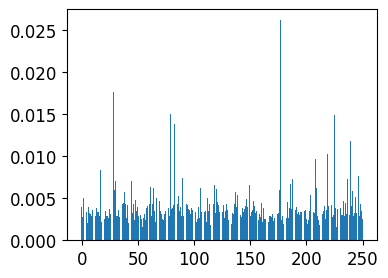

In [234]:
from matplotlib import pyplot
model = RandomForestClassifier(n_estimators=40, max_features='sqrt')
model.fit(X_train, Y_train)
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Boosting

1
2
3
4
5


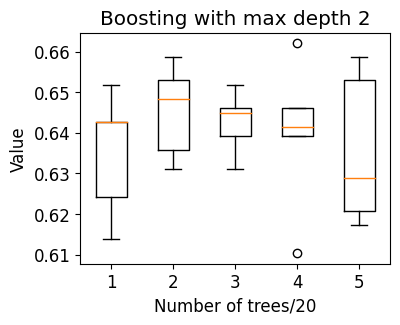

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
Y_train=np.ravel(Y_train)
df_results=[None for y in range (5)]
for i in range(1,6):
    print(i)
    model = GradientBoostingClassifier(n_estimators=20*i, max_depth=2,criterion='squared_error')
    # cv = RepeatedStratifiedKFold()
    scores= cross_val_score(model,X_train, Y_train, scoring='accuracy', cv=5)
    df_results[i-1]=scores
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots()
ax.boxplot([df_results[0],df_results[1],df_results[2],df_results[3],df_results[4]])
ax.set_xlabel('Number of trees/20')
ax.set_title('Boosting with max depth 2')
ax.set_ylabel('Value')
plt.show()

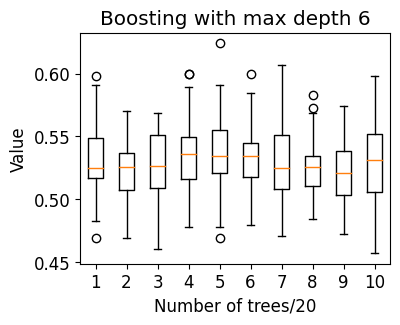

In [217]:
from sklearn.ensemble import GradientBoostingClassifier

df_results=[None for y in range (10)]
for i in range(1,11):
    model = GradientBoostingClassifier(n_estimators=20*i, max_depth=6)
    cv = RepeatedStratifiedKFold()
    scores= cross_val_score(clf,X_train, Y_train, scoring='accuracy', cv=cv)
    df_results[i-1]=scores
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots()
ax.boxplot([df_results[0],df_results[1],df_results[2],df_results[3],df_results[4],df_results[5],df_results[6],df_results[7],df_results[8],df_results[9]])
ax.set_xlabel('Number of trees/20')
ax.set_title('Boosting with max depth 6')
ax.set_ylabel('Value')
plt.show()

# SVM

In [239]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)
cv = RepeatedStratifiedKFold()
scores= cross_val_score(clf,X_train, Y_train, scoring='accuracy', cv=cv)
print("linear")
print(np.mean(scores))
print(np.std(scores))
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train)
cv = RepeatedStratifiedKFold()
scores= cross_val_score(clf,X_train, Y_train, scoring='accuracy', cv=cv)
print("rbf")
print(np.mean(scores))
print(np.std(scores))

linear
0.5325040881621045
0.0229410824656449
rbf
0.6430437255599004
0.020095367061592973


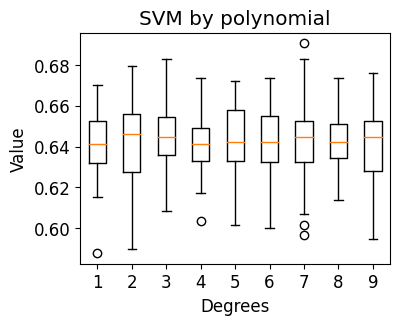

In [127]:

df_results=[None for y in range (9)]
for i in range(1,10):
    clf = svm.SVC(degree=i)
    cv = RepeatedStratifiedKFold()
    scores= cross_val_score(clf,X_train, Y_train, scoring='accuracy', cv=cv)
    df_results[i-1]=scores
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12
fig, ax = plt.subplots()
ax.boxplot([df_results[0],df_results[1],df_results[2],df_results[3],df_results[4],df_results[5],df_results[6],df_results[7],df_results[8]])
ax.set_xlabel('Degrees')
ax.set_title('SVM by polynomial')
ax.set_ylabel('Value')
plt.show()

In [245]:
pca=PCA(n_components=3)
principalcomponents=pca.fit_transform(X_train)
principaldf=pd.DataFrame(data=principalcomponents, columns=['principal component1', 'principal component2', 'principal component3'])
df_results=[None for y in range (9)]
for i in range(2,11):
    clf = svm.SVC(degree=i)
    cv = RepeatedStratifiedKFold()
    # scores= cross_val_score(clf,principaldf, Y_train, scoring='accuracy', cv=cv)
    print(cross_validate(clf,principaldf, Y_train, scoring='accuracy', return_train_score=True))
    # df_results[i-2]=scores
# plt.style.use('default')
# plt.rcParams['figure.figsize'] = (4, 3)
# plt.rcParams['font.size'] = 12
# fig, ax = plt.subplots()
# ax.boxplot([df_results[0],df_results[1],df_results[2],df_results[3],df_results[4],df_results[5],df_results[6],df_results[7],df_results[8]])
# ax.set_xlabel('Degrees')
# ax.set_title('SVM by polynomial')
# ax.set_ylabel('Value')
# plt.show()

{'fit_time': array([0.03299832, 0.03299928, 0.03199959, 0.04400206, 0.08699942]), 'score_time': array([0.01600051, 0.01599836, 0.01499963, 0.02699924, 0.01799965]), 'test_score': array([0.65635739, 0.64261168, 0.63448276, 0.62413793, 0.65862069]), 'train_score': array([0.64857881, 0.64771748, 0.65060241, 0.65576592, 0.64802065])}
{'fit_time': array([0.04100013, 0.03700018, 0.03699827, 0.03200078, 0.03200221]), 'score_time': array([0.02000189, 0.01999998, 0.01599979, 0.01599956, 0.01599789]), 'test_score': array([0.65635739, 0.64261168, 0.63448276, 0.62413793, 0.65862069]), 'train_score': array([0.64857881, 0.64771748, 0.65060241, 0.65576592, 0.64802065])}
{'fit_time': array([0.0319984 , 0.03299713, 0.03300261, 0.03200006, 0.03299904]), 'score_time': array([0.01500082, 0.01600027, 0.01599813, 0.01600099, 0.01600051]), 'test_score': array([0.65635739, 0.64261168, 0.63448276, 0.62413793, 0.65862069]), 'train_score': array([0.64857881, 0.64771748, 0.65060241, 0.65576592, 0.64802065])}
{'fi

# Test

In [76]:
X_test=pd.read_csv('OnlineAd_X_test.csv',header=None)
clf = svm.SVC(degree=2)
clf.fit(X_train, Y_train)
clf.predict(X_test)

NameError: name 'svm' is not defined

In [79]:
X_test=pd.read_csv('OnlineAd_X_test.csv',header=None)
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train)
clf.predict(X_test)

array([3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1.,
       1., 3., 1., 1., 1., 3., 1., 1., 1., 3., 3., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 3., 1., 3., 1., 1., 3., 1., 1., 3., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 3., 1., 1., 3., 1.,
       1., 3., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 3., 1., 1.,
       1., 3., 1., 1., 1., 3., 3., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 3., 1., 1., 3., 1., 3., 3., 1., 1., 1., 1., 3., 1.,
       1., 1., 1., 1., 3., 3., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 3.,
       1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 3., 1., 3., 3., 3., 1., 1., 3., 1., 1., 1., 1., 3., 1., 1.,
       1., 3., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1.,
       3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1.,
       3., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 3., 1.,
       1., 3., 1., 1., 3.

# Trees+LR

In [59]:
# Changing given dataset into binary classification

Y_train_tmp=pd.read_csv('OnlineAd_Y_train.csv',names= ['No click','class A','class B'])
Y_train_A=Y_train_tmp['class A']
Y_train_B=Y_train_tmp['class B']
M_train_A=pd.concat([X_train,Y_train_A], axis=1)
M_train_B=pd.concat([X_train,Y_train_B], axis=1)



      0       1       2       3       4       5       6       7       8    \
0  0.9687 -0.3948 -0.5467 -0.1611  0.3003 -0.3423 -0.2714 -0.3337  0.4581   
1 -0.4669  0.5222  0.6956 -0.6545  0.4683 -1.3767 -0.8648 -0.1455  1.0665   
2 -1.1187  0.2340 -0.0558 -0.3746  0.2157 -0.7238  0.1127 -0.3854 -0.4403   
3  0.6143  0.1321  0.3065  0.4454 -1.3510  0.4344  0.9074 -0.4787  0.5226   
4  0.9119  1.1340  0.4638  0.3419  0.8532  0.7698  0.8161  0.9577  0.3371   

      9    ...     241     242     243     244     245     246     247  \
0  0.0075  ... -1.6922  0.1422  0.9220 -0.0883  0.7012  0.6710 -0.3856   
1 -0.3412  ... -1.5445  0.4600 -0.3467  0.6233  0.0138 -0.4127 -0.2212   
2 -0.3354  ... -0.9666  0.2869  0.1066  0.4575 -0.0295  1.5963  0.1855   
3  1.1743  ... -0.1865  0.5274  0.1729 -0.6284 -0.7961  0.5320  0.0886   
4  0.6994  ...  0.6064  0.0781  0.6539  1.1777  0.8706  0.7935  0.4019   

      248     249     250  
0  0.5162 -0.3330  0.0466  
1 -0.0751 -1.6022  0.4181  
2  0.242

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.preprocessing as pp

M_train_A_randomized=M_train_A.sample(frac=1)
for count in range(5):
    train = M_train_A_randomized.iloc[290*count:290*(count+1),:]
    test= pd.concat([M_train_A_randomized.iloc[:290*count,:],M_train_A_randomized.iloc[290*(count+1):,:]])
    model = GradientBoostingClassifier(max_depth=2, criterion='squared_error')
    X_train_set=train.iloc[:,0:251]
    Y_train_set=train["class A"]
    X_test_set=test.iloc[:,0:251]
    Y_test_set=test["class A"]
    model.fit(X_train_set,Y_train_set)
    leaves=pd.DataFrame(model.apply(X_train_set)[:,:,0])
    enc=pp.OneHotEncoder().fit(leaves)
    x_enc=enc.transform(leaves)
    logreg=LogisticRegression(max_iter=1000).fit(x_enc, Y_train_set)
    leaves2=pd.DataFrame(model.apply(X_test_set)[:,:,0])
    X_set2_enc=enc.transform(leaves2)
    print(logreg.score(X_set2_enc, Y_test_set))


0.7736660929432013
0.7848537005163512
0.7461273666092944
0.7616179001721171
0.7676419965576592


In [140]:
# Training Using Whole Datasets
model = GradientBoostingClassifier(max_depth=2, criterion='squared_error')
model.fit(X_train,Y_train_A)
leaves=pd.DataFrame(model.apply(X_train)[:,:,0])
enc=pp.OneHotEncoder().fit(leaves)
x_enc=enc.transform(leaves)
logreg=LogisticRegression(max_iter=1000).fit(x_enc, Y_train_A)
# logreg.predict(x_enc)

# Prediction Using Test Datasets
leaves_test=pd.DataFrame(model.apply(X_test)[:,:,0])
enc_test=pp.OneHotEncoder().fit(leaves_test)
x_enc_test=enc.transform(leaves_test)
result_a=logreg.predict(x_enc_test)
result_a=pd.DataFrame(result_a)
result_a.to_excel('result_a.xlsx')

In [94]:
logreg.predict_log_proba(x_enc_test)

array([[-7.97624964e-03, -4.83527242e+00],
       [-1.94874488e+00, -1.53679006e-01],
       [-6.09578911e-02, -2.82789608e+00],
       [-8.70465373e-02, -2.48451997e+00],
       [-2.17761773e-01, -1.63125942e+00],
       [-5.19936484e-03, -5.26181736e+00],
       [-2.14624453e-05, -1.07492166e+01],
       [-1.19331831e-01, -2.18491982e+00],
       [-4.52959226e-02, -3.11710073e+00],
       [-3.93134078e-02, -3.25578196e+00],
       [-6.23034520e-05, -9.68352488e+00],
       [-1.77915811e+00, -1.84860997e-01],
       [-1.37735443e+00, -2.90679899e-01],
       [-3.35554027e-01, -1.25506219e+00],
       [-1.09215298e-02, -4.52247502e+00],
       [-1.43272791e-03, -6.54889130e+00],
       [-4.02962978e-03, -5.51609491e+00],
       [-4.92991098e-04, -7.61526593e+00],
       [-1.10772372e+00, -4.00940337e-01],
       [-1.20718510e-02, -4.42290875e+00],
       [-5.39519840e-04, -7.52510075e+00],
       [-4.35243226e+00, -1.29590651e-02],
       [-4.43411304e-01, -1.02678429e+00],
       [-3.

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.preprocessing as pp

M_train_B_randomized=M_train_B.sample(frac=1)
for count in range(5):
    train = M_train_B_randomized.iloc[290*count:290*(count+1),:]
    test= pd.concat([M_train_B_randomized.iloc[:290*count,:],M_train_B_randomized.iloc[290*(count+1):,:]])
    model = GradientBoostingClassifier(max_depth=2, criterion='squared_error')
    X_train_set=train.iloc[:,0:251]
    Y_train_set=train["class B"]
    X_test_set=test.iloc[:,0:251]
    Y_test_set=test["class B"]
    model.fit(X_train_set,Y_train_set)
    leaves=pd.DataFrame(model.apply(X_train_set)[:,:,0])
    enc=pp.OneHotEncoder().fit(leaves)
    x_enc=enc.transform(leaves)
    logreg=LogisticRegression(max_iter=1000).fit(x_enc, Y_train_set)
    leaves2=pd.DataFrame(model.apply(X_test_set)[:,:,0])
    X_set2_enc=enc.transform(leaves2)
    print(logreg.score(X_set2_enc, Y_test_set))


0.7839931153184165
0.7779690189328744
0.7917383820998278
0.7641996557659209
0.7848537005163512


In [138]:
# Training Using Whole Datasets
model = GradientBoostingClassifier(max_depth=2, criterion='squared_error')
model.fit(X_train,Y_train_B)
leaves=pd.DataFrame(model.apply(X_train)[:,:,0])
enc=pp.OneHotEncoder().fit(leaves)
x_enc=enc.transform(leaves)
logreg=LogisticRegression(max_iter=1000).fit(x_enc, Y_train_B)
# logreg.predict(x_enc)

# Prediction Using Test Datasets
leaves_test=pd.DataFrame(model.apply(X_test)[:,:,0])
enc_test=pp.OneHotEncoder().fit(leaves_test)
x_enc_test=enc.transform(leaves_test)
result_b=logreg.predict(x_enc_test)
result_b=pd.DataFrame(result_b)
result_b.to_excel('result_b.xlsx')


In [134]:
logreg.predict_log_proba(x_enc_test)

array([[-4.30731480e-01, -1.04991766e+00],
       [-3.40232333e-02, -3.39767504e+00],
       [-3.45475531e-02, -3.38264260e+00],
       [-6.58845934e-02, -2.75261209e+00],
       [-1.56649121e-01, -1.93104919e+00],
       [-8.72435176e-03, -4.74599611e+00],
       [-6.43241214e-02, -2.77581025e+00],
       [-1.18366670e-01, -2.19256773e+00],
       [-8.26523716e-04, -7.09869518e+00],
       [-3.62373952e-02, -3.33572766e+00],
       [-1.14834327e-04, -9.07207752e+00],
       [-4.39916580e-05, -1.00315325e+01],
       [-2.44713909e-03, -6.01405897e+00],
       [-8.91768642e-02, -2.46139074e+00],
       [-2.24428911e-02, -3.80798183e+00],
       [-2.21851926e-02, -3.81940230e+00],
       [-7.07875231e-05, -9.55586319e+00],
       [-4.90645165e-05, -9.92239899e+00],
       [-2.00439050e-02, -3.91983537e+00],
       [-3.83880970e-03, -5.56451173e+00],
       [-2.15009317e-02, -3.85039021e+00],
       [-2.47934731e-02, -3.70954596e+00],
       [-7.29283431e-01, -6.58271345e-01],
       [-2.

In [56]:
DT_A=pd.DataFrame(model.predict(X_set1))
logreg=LogisticRegression(max_iter=1000).fit(x_enc, Y_set1)
leaves2=pd.DataFrame(model.apply(X_set2)[:,:,0])
X_set2_enc=enc.transform(leaves2)

scores= cross_val_score(logreg,X_set2_enc, Y_set2, cv=5)
print(scores)

# model.fit(X_train, Y_train_A)

[0.78021978 0.74725275 0.74444444 0.74444444 0.73333333]
